# Median housing value prediction

The housing data can be downloaded from https://raw.githubusercontent.com/ageron/handson-ml/master/. The script has codes to download the data. We have modelled the median house value on given housing data. 

The following techniques have been used: 

 - Linear regression
 - Decision Tree
 - Random Forest

## Steps performed
 - We prepare and clean the data. We check and impute for missing values.
 - Features are generated and the variables are checked for correlation.
 - Multiple sampling techinuqies are evaluated. The data set is split into train and test.
 - All the above said modelling techniques are tried and evaluated. The final metric used to evaluate is root mean squared error.

## To set up the project
1. Clone the repository in a local directory.
```
git clone https://github.com/rajat-here-tiger/mle-training
cd mle-training
```
2. Create and activate virtual python development environment. On terminal, run
```
conda env create -f env.yaml
source activate devenv
```
3. Download the housing data. On terminal, run
```
bash download_data.sh 
```
4. Install the package in development mode. On terminal, run
```
pip install -e .
```
5. Verify correct installation
```
python verify_correct_install.py
```
6. Generate Sphinx Documentation
```
cd docs
make html
```
# Structure of project
```
.
├── README.md
├── docs
│   ├── Makefile
│   ├── _static
│   ├── conf.py
│   ├── index.rst
│   ├── make.bat
│   ├── mle_training.rst
│   ├── mle_training.utils.rst
│   └── modules.rst
├── download_data.sh
├── env.yaml
├── exploration_notebook
│   └── example_notebook.ipynb
├── mle_training
│   ├── __init__.py
│   ├── predict.py
│   ├── score_pretrained.py
│   ├── train_score.py
│   └── utils
│       ├── __init__.py
│       ├── data_exploration.py
│       └── data_preprocess.py
├── setup.py
├── tests
│   ├── test_score_pretrained.py
│   └── test_utils_data_exploration.py
└── verify_correct_install.py
```

## Using the package

### 1. Preprocess the raw housing data for modeling

In [3]:
from mle_training.utils import data_preprocess as preprocess
import pandas as pd
# Get data
housing = pd.read_csv('../data/small_sample_data/housing.csv')

# Stratified split based on income category
train_data, test_data = preprocess.data_strat_split(data=housing,test_size=0.2,random_state=42)

# Uncomment for Random split
# train_data, test_data = preprocess.data_random_split(data=housing, test_size=0.2, random_state=42)

# Fit missing value imputer on train data
preprocess.fit(train_data=train_data)

# Transform train and test data
X_train, y_train = preprocess.transform(data=train_data)
X_test, y_test = preprocess.transform(data=test_data)

2020-11-13 01:24:47,563 Splitting the data into train/test
2020-11-13 01:24:47,741 Fitting imputer for missing values
2020-11-13 01:24:47,849 Creating pickle file for Imputer
2020-11-13 01:24:47,851 Extracting Dependent and Independent variables.
2020-11-13 01:24:47,858 Dealing with missing values
2020-11-13 01:24:47,868 Importing the Imputer pickle file
2020-11-13 01:24:47,897 Creating New Features
2020-11-13 01:24:47,916 Encoding Categorical Variables
2020-11-13 01:24:47,941 Extracting Dependent and Independent variables.
2020-11-13 01:24:47,960 Dealing with missing values
2020-11-13 01:24:47,969 Importing the Imputer pickle file
2020-11-13 01:24:47,993 Creating New Features
2020-11-13 01:24:48,010 Encoding Categorical Variables


### 2. Modeling

In [5]:
from mle_training import train_score  # train and score module
from mle_training import score_pretrained  # module to score pretrained model
from mle_training import predict  # module to make predictions

#### 1. Linear Regression Model

In [6]:
# Fit model and score on training set
lin_model = train_score.linear_reg_model(X=X_train, y=y_train)

# Additional optional arguments
# param_grid = [{"fit_intercept": [True, False]}]  # Example hyperparameters to tune
# method = "grid_search"  # "grid_search" (default) or "random_search", method to perform hyperparameter tuning
# lin_model = train_score.lin_reg_model(X=X_train, y=y_train, param_grid=param_grid, method="random_search")

# Make predictions from pretrained model (can be a model stored in a pickle file)
y_pred = predict.model_predict(model=lin_model, X=X_test)

# Score trained model on test set (can be a model stored in a pickle file)
lin_rmse = score_pretrained.model_score(model=lin_model, X=X_test, y=y_test)


2020-11-13 01:25:24,019 Training Linear Regression Model
2020-11-13 01:25:24,870 Calculating Model Score on Training Data
2020-11-13 01:25:25,019 Model RMSE Score 203870.444
2020-11-13 01:25:25,023 Exporting Model into ../pickles/models/Pickle_Linear_Model.pkl
2020-11-13 01:25:25,035 Predicting Model Outcome
2020-11-13 01:25:25,052 Scoring Model Performance on Test Data
2020-11-13 01:25:25,060 Model RMSE Score 67796.575


In [7]:
lin_rmse

67796.57468637418

#### 2. Decision Tree Regression Model

In [4]:
# Fit model and score on training set
tree_model = train_score.tree_reg_model(X=X_train, y=y_train)

# Additional optional arguments
# param_grid = [{'criterion': ['mse','mae'], 'max_depth': [2, 4]}]  # Example hyperparameters to tune
# method = "grid_search"  # "grid_search" (default) or "random_search", method to perform hyperparameter tuning
# tree_model = train_score.tree_reg_model(X=X_train, y=y_train, param_grid=param_grid, method="random_search")

# Make predictions from pretrained model (can be a model stored in a pickle file)
y_pred = predict.model_predict(model=tree_model, X=X_test)

# Score trained model on test set (can be a model stored in a pickle file)
tree_rmse = score_pretrained.model_score(model=tree_model, X=X_test, y=y_test)

2020-11-12 22:04:03,313 Training Decision Tree Regression Model
2020-11-12 22:04:03,683 Calculating Model Score on Training Data
2020-11-12 22:04:05,031 Model RMSE Score 71450.696
2020-11-12 22:04:05,032 Exporting Model into ../pickles/models/Pickle_Tree_Model.pkl
2020-11-12 22:04:05,041 Predicting Model Outcome
2020-11-12 22:04:05,049 Scoring Model Performance on Test Data
2020-11-12 22:04:05,056 Model RMSE Score 70969.768


#### 3. Random Forest Regression Model

In [5]:
# Fit model and score on training set
forest_model = train_score.forest_reg_model(X=X_train, y=y_train)

# Additional optional arguments
# param_grid = [
#     # try 12 (3×4) combinations of hyperparameters
#     {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
#     # then try 6 (2×3) combinations with bootstrap set as False
#     {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]},
# ] # Example hyperparameters to tune
# method = "grid_search"  # "grid_search" (default) or "random_search", method to perform hyperparameter tuning
# forest_model = train_score.tree_reg_model(X=X_train, y=y_train, param_grid=param_grid, method="grid_search")

# Make predictions from pretrained model (can be a model stored in a pickle file)
y_pred = predict.model_predict(model=forest_model, X=X_test)

# Score trained model on test set (can be a model stored in a pickle file)
forest_rmse = score_pretrained.model_score(model=forest_model, X=X_test, y=y_test)

2020-11-12 22:04:09,950 Training Random Forest Regression Model
2020-11-12 22:04:12,468 Evaluating Feature Importance in Random Forrest Regressor
2020-11-12 22:04:12,498 Calculating Model Score on Training Data
Feature Importance:
 [(0.3451103236913101, 'median_income'), (0.1478412844883504, 'ocean_proximity_INLAND'), (0.11218326908225117, 'population_per_household'), (0.07783681697706872, 'longitude'), (0.07517466068925341, 'bedrooms_per_room'), (0.07179004008993167, 'latitude'), (0.05391086257496506, 'rooms_per_household'), (0.04242440016669158, 'housing_median_age'), (0.017789710715344784, 'total_rooms'), (0.01726300298017504, 'population'), (0.01604878496021236, 'total_bedrooms'), (0.015968685730398054, 'households'), (0.003998579606979546, 'ocean_proximity_NEAR OCEAN'), (0.0026028177981955174, 'ocean_proximity_NEAR BAY'), (5.6760448872649945e-05, 'ocean_proximity_ISLAND')]
2020-11-12 22:04:21,349 Model RMSE Score 49868.925
2020-11-12 22:04:21,351 Exporting Model into ../pickles/mo

### 3. Data Exploration functions

These functions can be used with raw housing data to:  
1. Generate lattitude vs longitude plots  
2. Finad correlation between independent and dependent variables  
3. Generate comparison between random and stratified splitting techniques

2020-11-12 22:05:35,206 Generating Plots for Exploratory Analysis
2020-11-12 22:05:35,525 Calculating correlation between independent and dependent variables
2020-11-12 22:05:35,536 Splitting the data into train/test
2020-11-12 22:05:35,557 Randomly Splitting the Housing Data
2020-11-12 22:05:35,570 Calculating Proportion of Income category across all samples


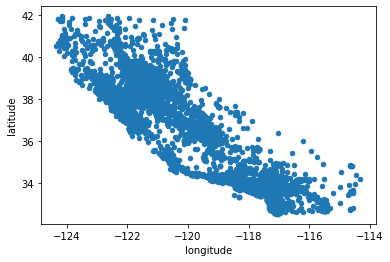

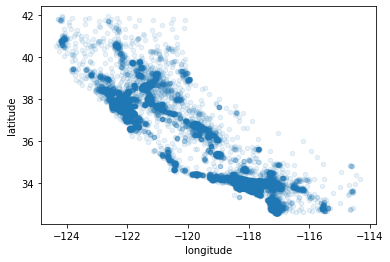

In [7]:
from mle_training.utils import data_exploration as explore

# Generate lattitude vs longitude plots
explore.lattitude_vs_longitude_plot(housing_data=housing)

# Correlation between independent and dependent variables
explore.corr_independent_dependent(housing_data=housing)

# Compare split proportion
# Stratified split based on income category
_, strat_test_data = preprocess.data_strat_split(data=housing, test_size=0.2, random_state=42)

# Random split
_, random_test_data = preprocess.data_random_split(data=housing, test_size=0.2, random_state=42)

compare_matrix = explore.compare_props(
    housing_data=housing,
    strat_test_set=strat_test_data,
    random_test_set=random_test_data,
)

### 4. Running tests
On terminal, run
```
pytest
```